In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
print(tf.keras.__version__)  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU,Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import seaborn as sns

3.7.0


In [36]:
df = pd.read_csv('/Users/mo/Desktop/Heart_disease1/heart.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [37]:
# Separate features (X) and target labels (y)
X = df.iloc[:, :-1].values  # All rows, all columns except the last one (features)
y = df.iloc[:, -1].values   # All rows, last column (target labels)

In [38]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (820, 13)
X_test shape: (205, 13)
y_train shape: (820,)
y_test shape: (205,)


In [39]:
# Standardize the features (zero mean, unit variance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check the transformed data (optional)
print(f"Scaled X_train: {X_train[:5]}")
print(f"Scaled X_test: {X_test[:5]}")


Scaled X_train: [[-5.85840222e-01  6.54653671e-01  1.00827500e+00 -7.79453566e-01
  -1.93503098e+00 -4.14039336e-01 -9.83741901e-01 -1.01909426e+00
  -7.25948939e-01 -2.10661213e-01  1.00526437e+00  2.17169136e+00
  -5.45193165e-01]
 [ 1.05147737e+00 -1.52752523e+00 -9.16720340e-01  2.74173173e+00
   1.61063407e+00 -4.14039336e-01  9.09845796e-01  2.02882145e-01
   1.37750735e+00 -9.12152360e-01  1.00526437e+00 -7.25467395e-01
  -5.45193165e-01]
 [-4.00676907e-02 -1.52752523e+00  1.00827500e+00 -1.34738668e+00
   4.42176271e-01 -4.14039336e-01 -9.83741901e-01  7.70228333e-01
  -7.25948939e-01 -9.12152360e-01  1.00526437e+00 -7.25467395e-01
  -5.45193165e-01]
 [ 5.05704840e-01  6.54653671e-01 -9.16720340e-01  1.86032724e-01
  -2.22635925e-01 -4.14039336e-01  9.09845796e-01  5.08376246e-01
  -7.25948939e-01 -4.73720393e-01 -6.40078509e-01 -7.25467395e-01
   1.11057867e+00]
 [-3.67531209e-01  6.54653671e-01  1.00827500e+00 -3.81900388e-01
  -1.03185928e-03  2.41522946e+00 -9.83741901e-01 

In [40]:
from keras.optimizers import Adam

model = Sequential()

# Add layers (input layer and hidden layers)
model.add(Dense(64, input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))  # LeakyReLU activation function
model.add(Dropout(0.3))

model.add(Dense(32))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))  # LeakyReLU activation function
model.add(Dropout(0.3))

# Add output layer
model.add(Dense(3, activation='softmax'))

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model with callbacks
result = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),
                   callbacks=[early_stopping, reduce_lr])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")




Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4211 - loss: 1.1853 - val_accuracy: 0.6634 - val_loss: 0.8585 - learning_rate: 0.0010
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7225 - loss: 0.7042 - val_accuracy: 0.7659 - val_loss: 0.6620 - learning_rate: 0.0010
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7534 - loss: 0.6058 - val_accuracy: 0.7951 - val_loss: 0.5642 - learning_rate: 0.0010
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8049 - loss: 0.4874 - val_accuracy: 0.8000 - val_loss: 0.5138 - learning_rate: 0.0010
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8315 - loss: 0.4479 - val_accuracy: 0.8000 - val_loss: 0.4928 - learning_rate: 0.0010
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8311 - loss: 0.4695 - val_accuracy: 0.8000 - val_loss: 0.4713 - learning_rate: 0.0010
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8347 - loss: 0.4190 - val_accuracy: 0.800

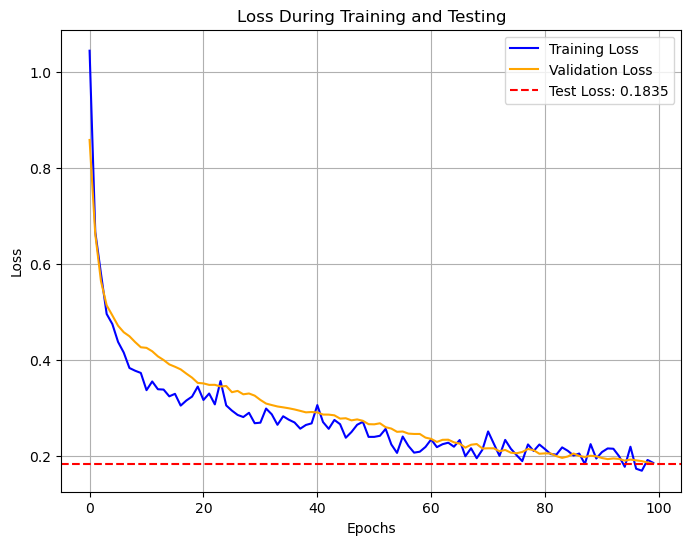

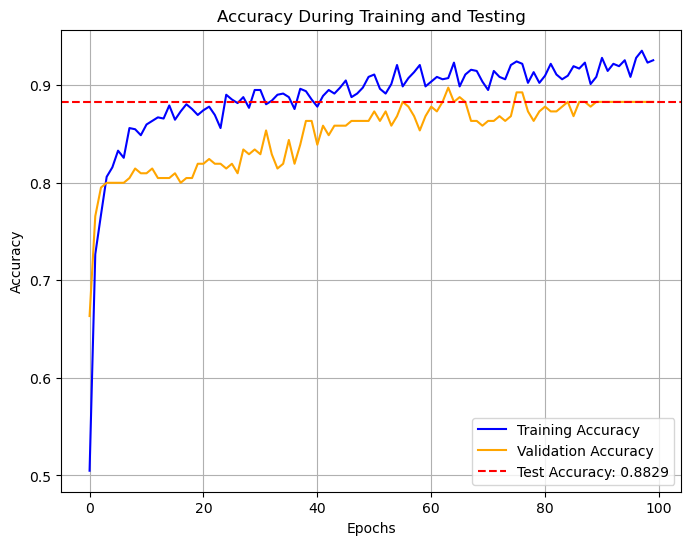

Model saved as 'heart disease.h5'


In [41]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(result.history['loss'], label='Training Loss', color='blue')
plt.plot(result.history['val_loss'], label='Validation Loss', color='orange')
plt.axhline(y=test_loss, color='red', linestyle='--', label=f'Test Loss: {test_loss:.4f}')
plt.title('Loss During Training and Testing')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(result.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.axhline(y=test_accuracy, color='red', linestyle='--', label=f'Test Accuracy: {test_accuracy:.4f}')
plt.title('Accuracy During Training and Testing')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
model.save('heart disease.h5')
print("Model saved as 'heart disease.h5'")

In [42]:
predictions = model.predict(X_test)

# Convert probabilities to binary class labels (1 for heart problem, 0 for no heart problem)
predicted_classes = (predictions >= 0.5).astype(int)  # Convert probabilities to 0 or 1

# Print the predicted classes
for i, pred in enumerate(predicted_classes):
    # Check the individual prediction value, since pred is now a 1D array
    if pred[0] == 1:
        print(f"Sample {i}: The person has a heart problem.")
    else:
        print(f"Sample {i}: The person does not have a heart problem.")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Sample 0: The person does not have a heart problem.
Sample 1: The person does not have a heart problem.
Sample 2: The person has a heart problem.
Sample 3: The person does not have a heart problem.
Sample 4: The person has a heart problem.
Sample 5: The person does not have a heart problem.
Sample 6: The person has a heart problem.
Sample 7: The person has a heart problem.
Sample 8: The person does not have a heart problem.
Sample 9: The person has a heart problem.
Sample 10: The person does not have a heart problem.
Sample 11: The person has a heart problem.
Sample 12: The person does not have a heart problem.
Sample 13: The person does not have a heart problem.
Sample 14: The person has a heart problem.
Sample 15: The person does not have a heart problem.
Sample 16: The person has a heart problem.
Sample 17: The person does not have a heart problem.
Sample 18: The person does not have a heart problem.
Sample 19: The person has a heart problem.
Sa

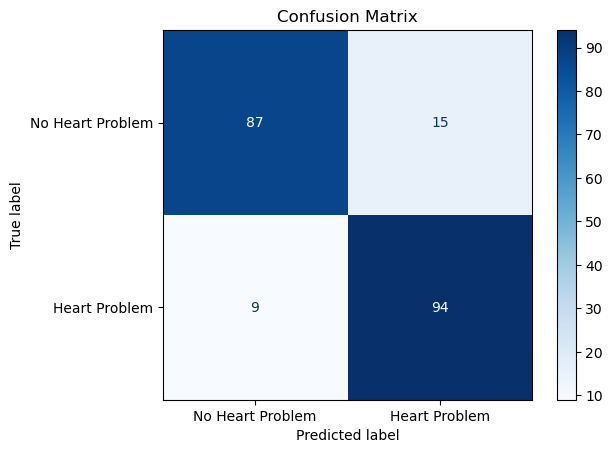

In [43]:
# Ensure predicted_classes is in the correct format
if len(predicted_classes.shape) > 1:
    # Convert from probabilities/one-hot to single-label
    predicted_classes = predicted_classes.argmax(axis=1)

# Ensure y_test is in the correct format
if len(y_test.shape) > 1:
    y_test = y_test.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Heart Problem", "Heart Problem"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [50]:

model = Sequential()

# Add layers (input layer and hidden layers)
model.add(Dense(128, input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))  # LeakyReLU activation function
model.add(Dropout(0.2))

model.add(Dense(64, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))  # LeakyReLU activation function
model.add(Dropout(0.2))

# Add output layer
model.add(Dense(3, activation='softmax'))

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model with callbacks
result = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),
                   callbacks=[early_stopping, reduce_lr])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5634 - loss: 2.0231 - val_accuracy: 0.8098 - val_loss: 1.6751 - learning_rate: 0.0010
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8348 - loss: 1.4579 - val_accuracy: 0.8098 - val_loss: 1.4802 - learning_rate: 0.0010
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8414 - loss: 1.2980 - val_accuracy: 0.8098 - val_loss: 1.3413 - learning_rate: 0.0010
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8581 - loss: 1.1952 - val_accuracy: 0.8146 - val_loss: 1.2179 - learning_rate: 0.0010
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8592 - loss: 1.0786 - val_accuracy: 0.8244 - val_loss: 1.1101 - learning_rate: 0.0010
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8746 - loss: 0.9738 - val_accuracy: 0.8439 - val_loss: 1.0013 - learning_rate: 0.0010
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8661 - loss: 0.9028 - val_accuracy: 0.843

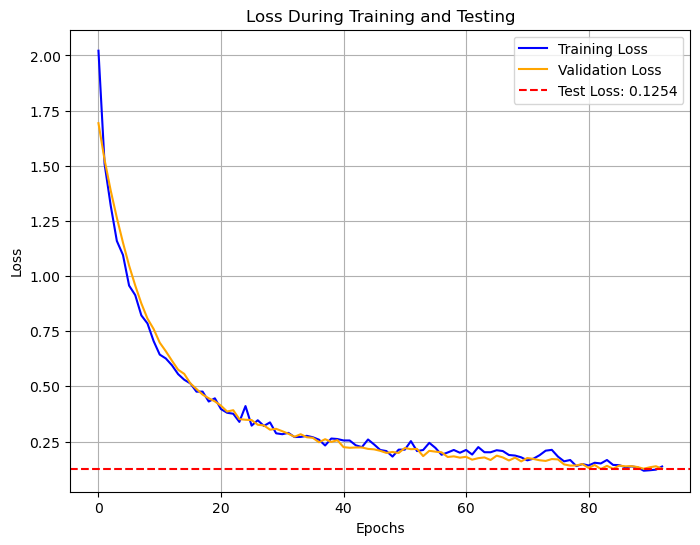

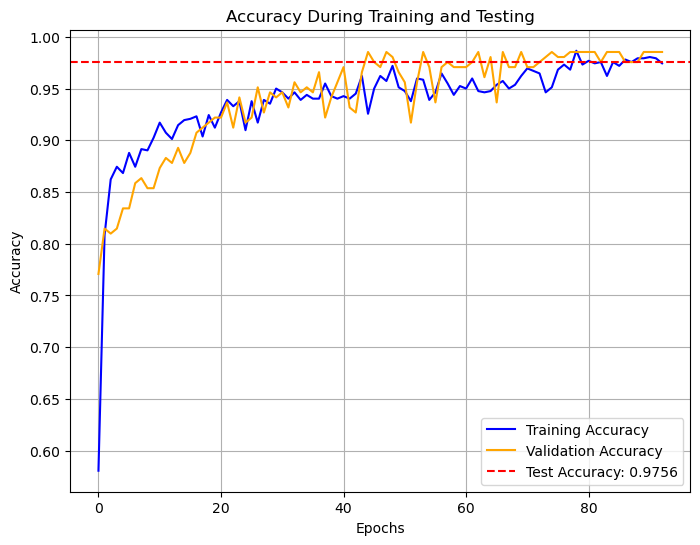

In [47]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(result.history['loss'], label='Training Loss', color='blue')
plt.plot(result.history['val_loss'], label='Validation Loss', color='orange')
plt.axhline(y=test_loss, color='red', linestyle='--', label=f'Test Loss: {test_loss:.4f}')
plt.title('Loss During Training and Testing')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(result.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.axhline(y=test_accuracy, color='red', linestyle='--', label=f'Test Accuracy: {test_accuracy:.4f}')
plt.title('Accuracy During Training and Testing')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
predictions = model.predict(X_test)

# Convert probabilities to binary class labels (1 for heart problem, 0 for no heart problem)
predicted_classes = (predictions >= 0.5).astype(int)  # Convert probabilities to 0 or 1

# Print the predicted classes
for i, pred in enumerate(predicted_classes):
    # Check the individual prediction value, since pred is now a 1D array
    if pred[0] == 1:
        print(f"Sample {i}: The person has a heart problem.")
    else:
        print(f"Sample {i}: The person does not have a heart problem.")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Sample 0: The person does not have a heart problem.
Sample 1: The person does not have a heart problem.
Sample 2: The person has a heart problem.
Sample 3: The person does not have a heart problem.
Sample 4: The person has a heart problem.
Sample 5: The person does not have a heart problem.
Sample 6: The person has a heart problem.
Sample 7: The person has a heart problem.
Sample 8: The person does not have a heart problem.
Sample 9: The person has a heart problem.
Sample 10: The person does not have a heart problem.
Sample 11: The person has a heart problem.
Sample 12: The person does not have a heart problem.
Sample 13: The person does not have a heart problem.
Sample 14: The person has a heart problem.
Sample 15: The person has a heart problem.
Sample 16: The person has a heart problem.
Sample 17: The person does not have a heart problem.
Sample 18: The person does not have a heart problem.
Sample 19: The person has a heart problem.
Sample 20: T

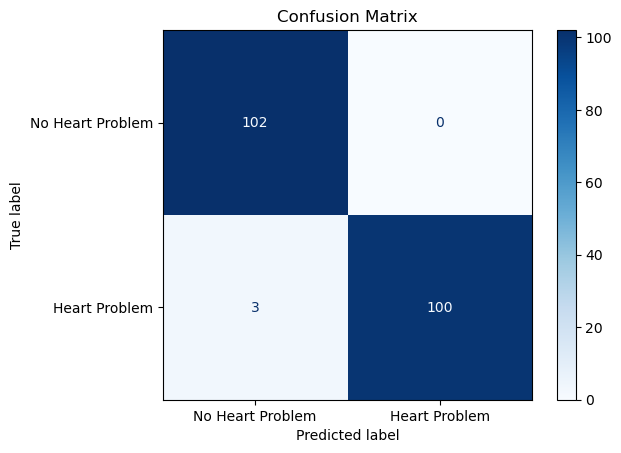

In [52]:
# Ensure predicted_classes is in the correct format
if len(predicted_classes.shape) > 1:
    # Convert from probabilities/one-hot to single-label
    predicted_classes = predicted_classes.argmax(axis=1)

# Ensure y_test is in the correct format
if len(y_test.shape) > 1:
    y_test = y_test.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Heart Problem", "Heart Problem"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
